In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib
import pickle
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA

sns.set(font_scale=1, context='notebook')
matplotlib.rcParams['figure.figsize'] = 10,10
plt.rcParams['axes.facecolor'] = '#f5f5f5'

saved_filename = 'test'

# Define Functions

In [32]:
def visualize_gates(gates, images, num_test_digits=10, shuffle=True):
    '''
    Visualize num_test_digits examples of gate activations
    '''
    # Indiviual cell is height=1, width=0.4
    width = 1 * gates.shape[2] # Cell width * num of modules
    height = 0.4 * gates.shape[1] # Cell height * num of layers
    figsize = (width, height) 

    plot_num = num_test_digits * 100 + 11
    for i in range(num_test_digits):
        # To shuffle
        if shuffle:
            k = (i + np.random.randint(low=0, high=gates.shape[0]-1)) % gates.shape[0]
        else:
            k = i

        plt.figure(figsize=(5, 2))
        plt.title('Number is: '+str(labels[k]))
        sns.heatmap(gates[k,:,:])
        plt.figure(figsize=(2, 2))
        plt.imshow(images[k])


def compute_cosine_sim(gates, parameter_dict, num_test_digits, trial = 2):
    '''
    Compute cosine similarity
    '''
    gate_vectors = np.reshape(gates, (-1, parameter_dict['L']*parameter_dict['M']))
    #print(gate_vectors.shape)
    gate_vectors = np.transpose(gate_vectors)

    output = np.zeros(num_test_digits)
    for i in range(num_test_digits):
        a = gate_vectors[:, trial]
        b = gate_vectors[:, i]
        an = a/np.linalg.norm(a)
        bn = b/np.linalg.norm(b)
        output[i] = np.dot(an,bn)

    print('output', output)
    elems = np.argsort(output)
    print('Most similar elems to trial', elems[::-1])
    
    
def visualize_model(gates_reshaped, labels, model):
    '''
    Visualize the data X, with label y with the model (t-SNE or PCA)
    '''
    print(gates_reshaped.shape) # sanity check
    independent_labels = list(set(labels))
    print(independent_labels) # sanity check

    x = model.fit_transform(gates_reshaped)
    y = labels

    # Add more colors if doing something other than MNIST
    colors = ['b','g','#00FFFF','c','m','y','k','#00A4BA','r','#F4C2C2']

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    for i in (independent_labels):
        mask_i = y == i
        x_i = x[mask_i]
        ax1.scatter(x_i[:,0], x_i[:,1], s=10, c=colors[i], label='Label: '+str(i))
    plt.legend(loc='upper left');
    plt.show()


def visualize_comparison(gates_reshaped, labels, model, digits=[7,8]):
    '''
    Same as visualize model but only plots certain digits 
    '''
    mask = labels == digits[0]
    for digit in digits:
        mask_digit = labels == digit
        mask = mask | mask_digit

    gates_reshaped_masked = gates_reshaped[mask, :]
    labels_masked = labels[mask]
    
    x = model.fit_transform(gates_reshaped_masked)
    y = labels_masked

    # Add more colors if doing something other than MNIST
    colors = ['b','g','#00FFFF','c','m','y','k','#00A4BA','r','#F4C2C2']

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    for i in (digits):
        mask_i = y == i
        x_i = x[mask_i]
        ax1.scatter(x_i[:,0], x_i[:,1], s=10, c=colors[i], label='Label: '+str(i))
    plt.legend(loc='upper left');
    plt.show()

<br><br><br>
# ------------------------------------------------------------------------------------
#                               Visualize gates and images
# ------------------------------------------------------------------------------------
<br>

# Load data
<br>

In [33]:
# Load gate vector data
with open('output/' + saved_filename + '.pkl', 'rb') as f:
        input = pickle.load(f)

# Get components from data
gates = np.array(input[0])
labels = np.array(input[1])
images = np.array(input[2])
parameter_dict = input[3]

print(parameter_dict)
print(labels.shape)
print(gates.shape)

{'tensor_size': 20, 'num_batches': 1001, 'gamma': 2, 'batch_size': 100, 'learning_rate': 0.001, 'L': 3, 'output_file': 'test', 'M': 10}
(1000,)
(1000, 3, 10)


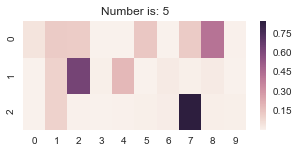

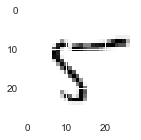

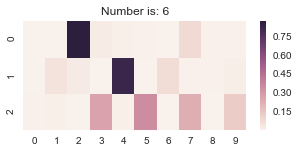

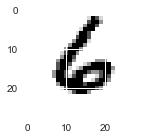

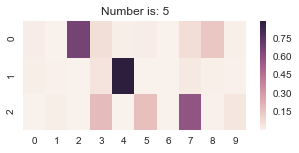

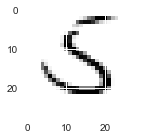

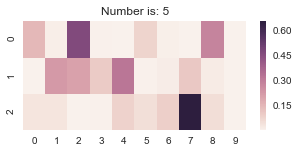

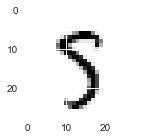

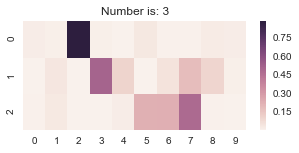

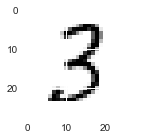

In [34]:
visualize_gates(gates, images, num_test_digits=5)

In [35]:
# Close all figures (so they don't stay open in memory)
plt.close('all')

In [36]:
compute_cosine_sim(gates, parameter_dict, num_test_digits=5, trial=2)

output [ 0.60242601  0.44610622  1.          0.62866126  0.62380747]
Most similar elems to trial [2 3 4 0 1]


# Visualizations of the gates (dim reduction)


In [37]:
# Preprocess to make gates the correct size
gates_reshaped = np.reshape(gates, [gates.shape[0], -1])

### Plot PCA

(1000, 30)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


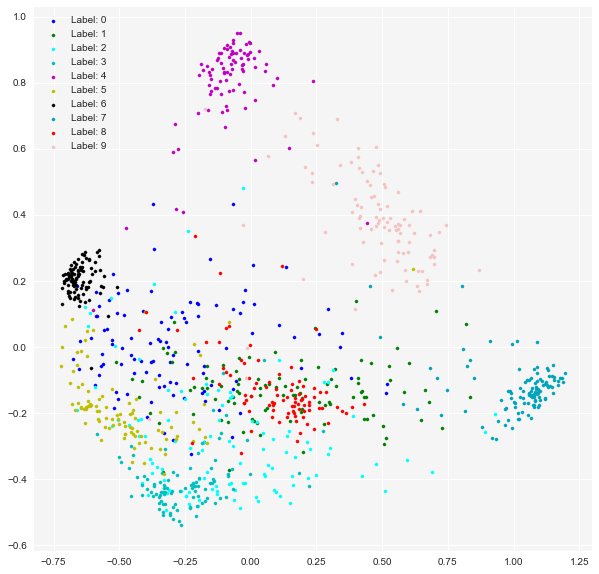

In [38]:
# Visualize PCA
visualize_model(gates_reshaped, labels, PCA())

### Plot t-SNE

(1000, 30)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.121292
[t-SNE] Iteration 25: error = 1.1210545, gradient norm = 0.0105281
[t-SNE] Iteration 50: error = 1.0577240, gradient norm = 0.0122381
[t-SNE] Iteration 75: error = 0.7286881, gradient norm = 0.0021105
[t-SNE] Iteration 100: error = 0.7052287, gradient norm = 0.0053620
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.705229
[t-SNE] Iteration 125: error = 0.6446411, gradient norm = 0.0008137
[t-SNE] Iteration 125: gradient norm 0.000814. Finished.
[t-SNE] Error after 125 iterations: 0.705229


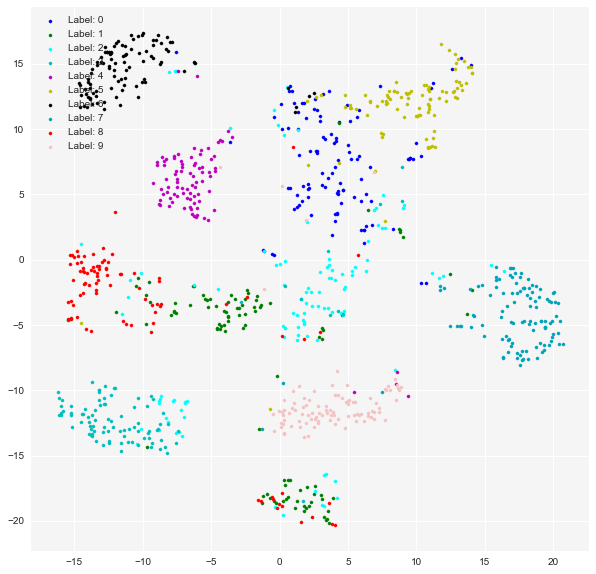

In [39]:
# Visualize t-SNE
visualize_model(gates_reshaped, labels, TSNE(verbose=100))

### Plot digit comparisons (PCA)

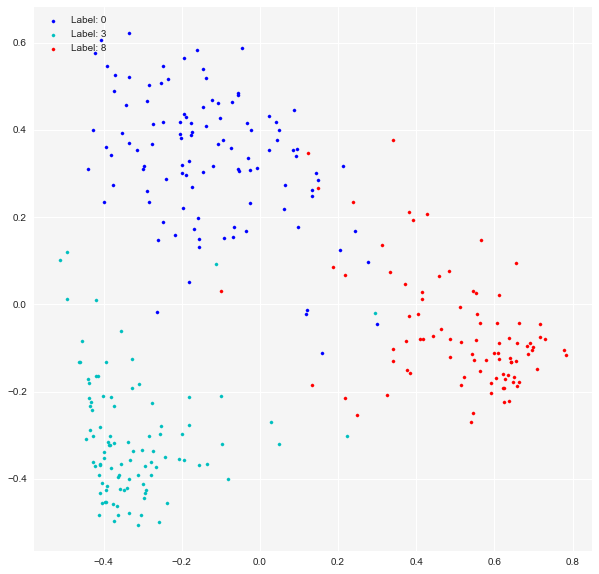

In [40]:
# Visualize the comparison between a and b (with PCA)
visualize_comparison(gates_reshaped, labels, PCA(), digits=[0,3,8])

### Plot digit comparisons (t-SNE)


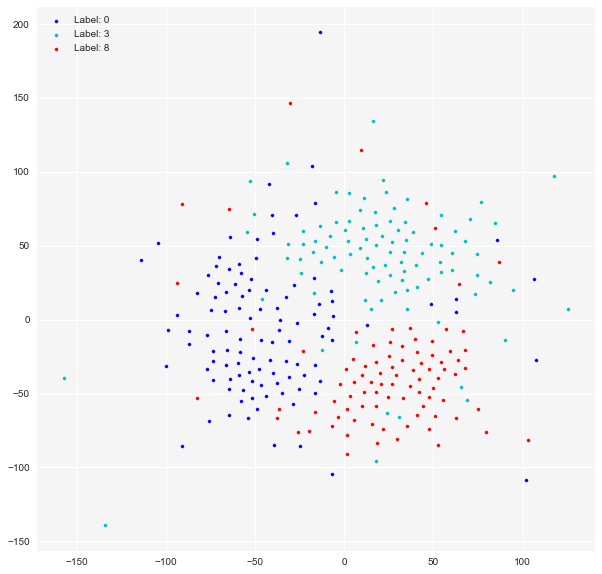

In [41]:
# Visualize the comparison between a and b (with t-SNE)
visualize_comparison(gates_reshaped, labels, TSNE(), digits=[0,3,8])

<br><br><br>
# ------------------------------------------------------------------------------------
#                      For final feature layer (pre-softmax layer)
# ------------------------------------------------------------------------------------
<br>

In [42]:
# Load gate vector data
with open('output/' + saved_filename + '__feature_layer_outputs' + '.pkl', 'rb') as f:
        input = pickle.load(f)

# Get components from data
features = np.array(input[0])
labels = np.array(input[1])
images = np.array(input[2])
parameter_dict = input[3]

print(parameter_dict)
print(labels.shape)
print(features.shape)

{'tensor_size': 20, 'num_batches': 1001, 'gamma': 2, 'batch_size': 100, 'learning_rate': 0.001, 'L': 3, 'output_file': 'test__feature_layer_outputs', 'M': 10}
(1000,)
(1000, 1, 10)


## Visualize predictions and images


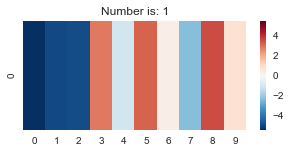

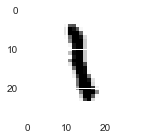

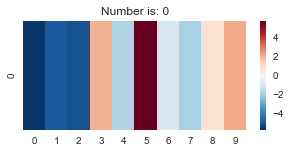

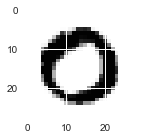

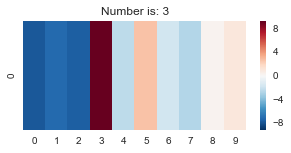

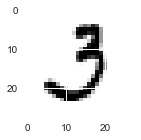

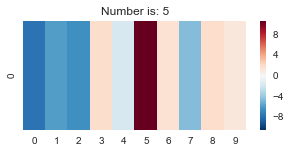

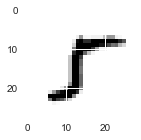

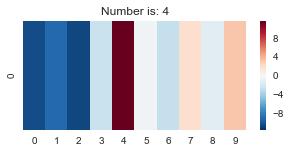

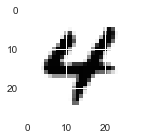

In [43]:
visualize_gates(features, images, num_test_digits=5)

In [44]:
# Close all figures (so they don't stay open in memory)
plt.close('all')

In [45]:
features_reshaped = np.reshape(features, [features.shape[0], -1])
print(features.shape)
print(features_reshaped.shape)
print(np.argmax(features, axis=0))

(1000, 1, 10)
(1000, 10)
[[ 31 613  31 209 327 319 427 332 998 532]]


### Plot PCA

(1000, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


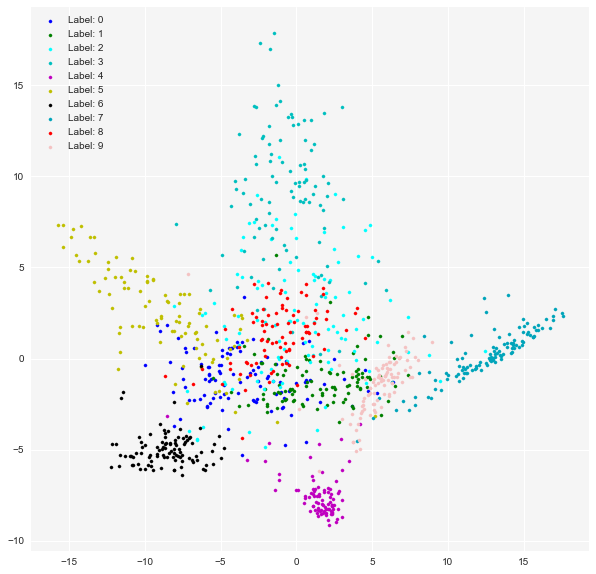

In [46]:
visualize_model(features_reshaped, labels, PCA())

### Plot t-SNE

(1000, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.761157
[t-SNE] Iteration 25: error = 1.1748201, gradient norm = 0.0071635
[t-SNE] Iteration 50: error = 1.0757879, gradient norm = 0.0098458
[t-SNE] Iteration 75: error = 0.7677671, gradient norm = 0.0012970
[t-SNE] Iteration 100: error = 0.7347469, gradient norm = 0.0027185
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.734747
[t-SNE] Iteration 125: error = 0.6704305, gradient norm = 0.0009084
[t-SNE] Iteration 125: gradient norm 0.000908. Finished.
[t-SNE] Error after 125 iterations: 0.734747


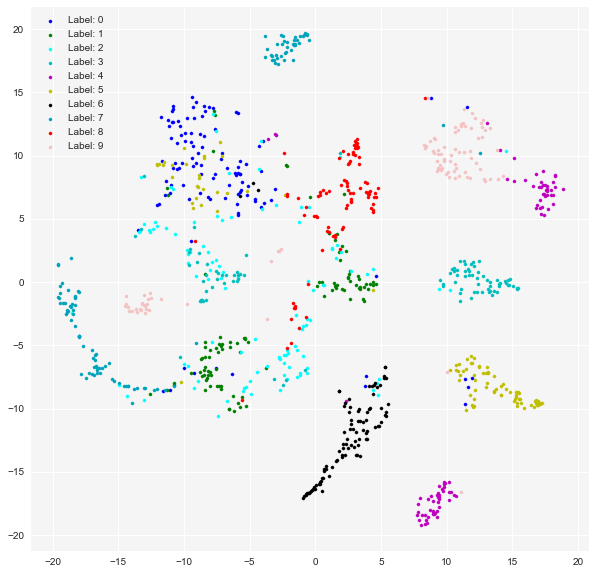

In [47]:
visualize_model(features_reshaped, labels, TSNE(verbose=100))

### Plot digit comparisons (PCA)

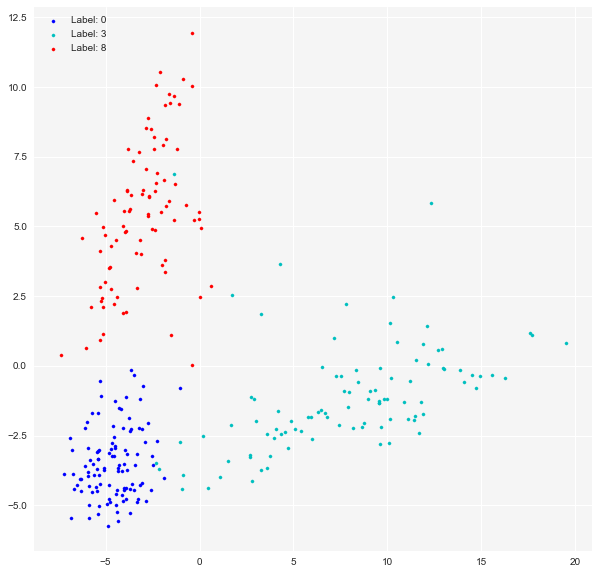

In [48]:
# Visualize the comparison between a and b (with PCA)
visualize_comparison(features_reshaped, labels, PCA(), digits=[0,3,8])

### Plot digit comparisons (t-SNE)

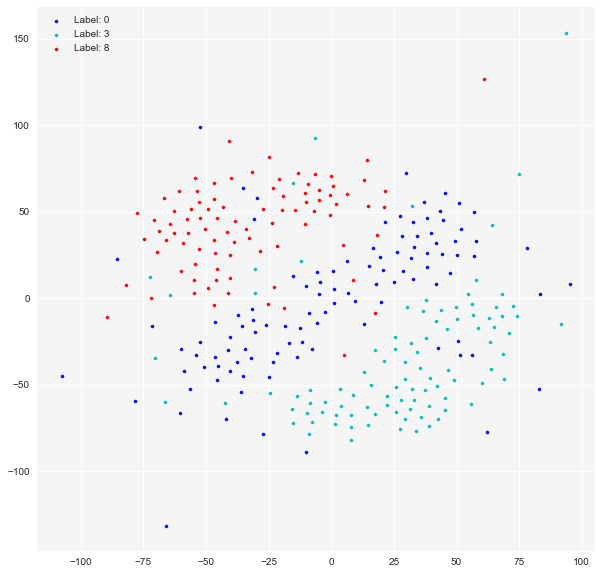

In [49]:
# Visualize the comparison between a and b (with t-SNE)
visualize_comparison(features_reshaped, labels, TSNE(), digits=[0,3,8])

<br><br><br>
# ------------------------------------------------------------------------------------
#                               For Softmax outputs of digits
# ------------------------------------------------------------------------------------
<br>

## Visualize Softmax Predictions

In [50]:
# Load gate vector data
with open('output/' + saved_filename + '__softmax_outputs' + '.pkl', 'rb') as f:
        input = pickle.load(f)

# Get components from data
preds = np.array(input[0])
labels = np.array(input[1])
images = np.array(input[2])
parameter_dict = input[3]

print(parameter_dict)
print(labels.shape)
print(preds.shape)

{'tensor_size': 20, 'num_batches': 1001, 'gamma': 2, 'batch_size': 100, 'learning_rate': 0.001, 'L': 3, 'output_file': 'test__softmax_outputs', 'M': 10}
(1000,)
(1000, 1, 10)


## Visualize predictions and images

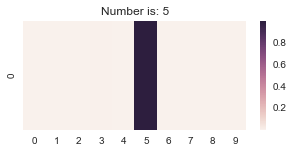

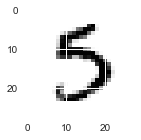

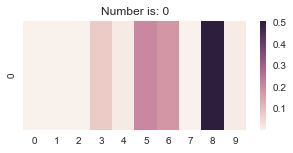

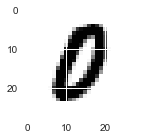

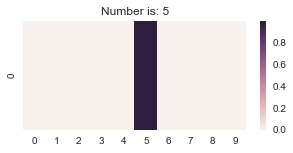

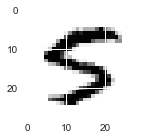

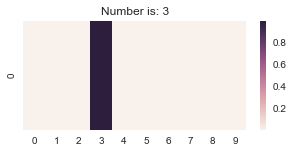

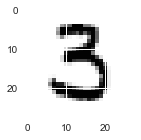

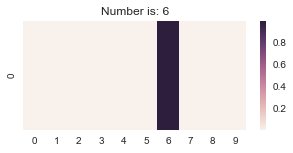

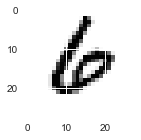

In [51]:
visualize_gates(preds, images, num_test_digits=5)

In [52]:
# Close all figures (so they don't stay open in memory)
plt.close('all')

In [53]:
preds_reshaped = np.reshape(preds, [preds.shape[0], -1])
print(preds.shape)
print(preds_reshaped.shape)
print(np.argmax(preds, axis=0))

(1000, 1, 10)
(1000, 10)
[[ 31  31  31 209 327 319 427  79 998 627]]


### Plot PCA

(1000, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


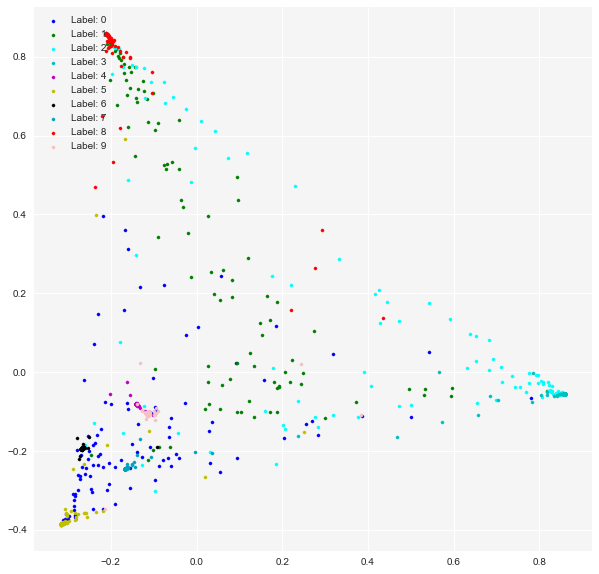

In [54]:
visualize_model(preds_reshaped, labels, PCA())

### Plot t-SNE

(1000, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.000434
[t-SNE] Iteration 25: error = 0.8868939, gradient norm = 0.0059603
[t-SNE] Iteration 50: error = 0.7669347, gradient norm = 0.0069213
[t-SNE] Iteration 75: error = 0.4934723, gradient norm = 0.0015222
[t-SNE] Iteration 100: error = 0.4568590, gradient norm = 0.0021706
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.456859
[t-SNE] Iteration 125: error = 0.4050750, gradient norm = 0.0012587
[t-SNE] Iteration 150: error = 0.3892709, gradient norm = 0.0012372
[t-SNE] Iteration 175: error = 0.3872160, gradient norm = 0.0018172
[t-SNE] Iteration 200: error = 0.3900083, gradient norm = 0.0024293
[t-SNE] Iteration 225: error = 0.3932736, gradient norm = 0.0026497
[t-SNE] Iteration 225: did not make any progress during the last 30 episodes. Finished.
[t-SNE]

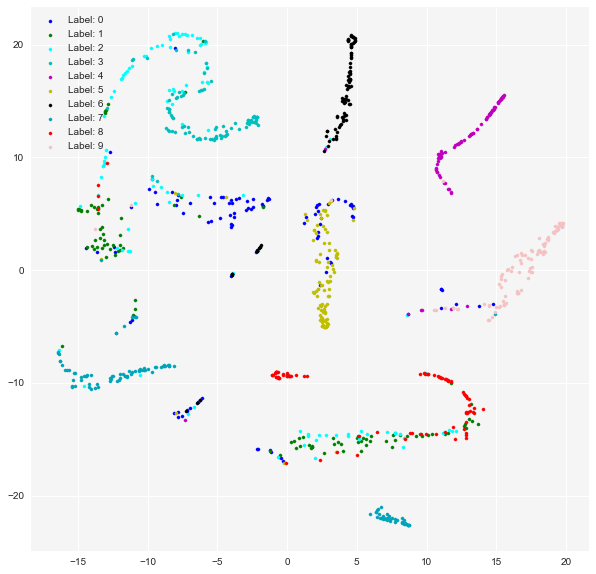

In [55]:
visualize_model(preds_reshaped, labels, TSNE(verbose=100))

### Plot digit comparisons (PCA)

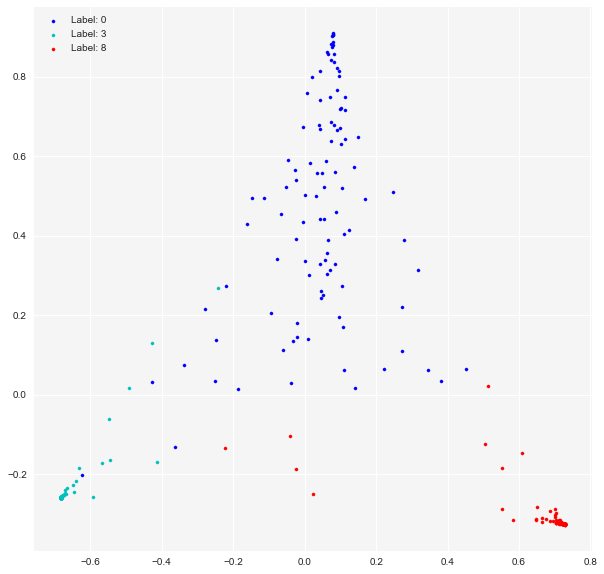

In [56]:
# Visualize the comparison between a and b (with PCA)
visualize_comparison(preds_reshaped, labels, PCA(), digits=[0,3,8])

### Plot digit comparisons (t-SNE)

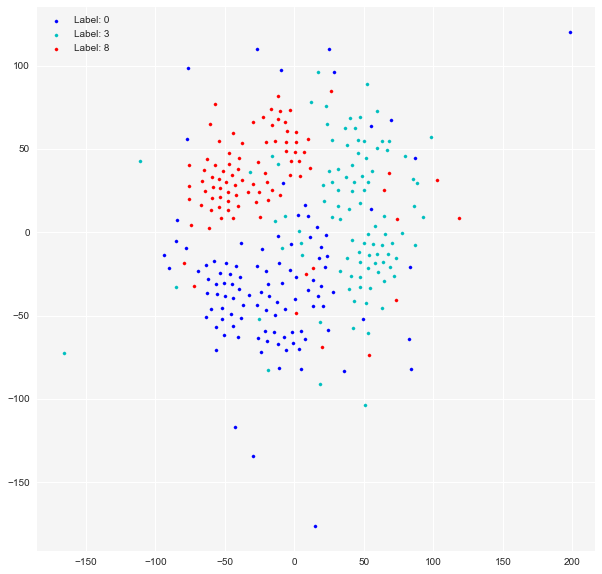

In [57]:
# Visualize the comparison between a and b (with t-SNE)
visualize_comparison(preds_reshaped, labels, TSNE(), digits=[0,3,8])

<br><br><br>
# ------------------------------------------------------------------------------------
#         Compare Performance of Gates vs Features  vs Combined
# -----------------------------------------------------------------------------------
<br>

(1000, 40)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


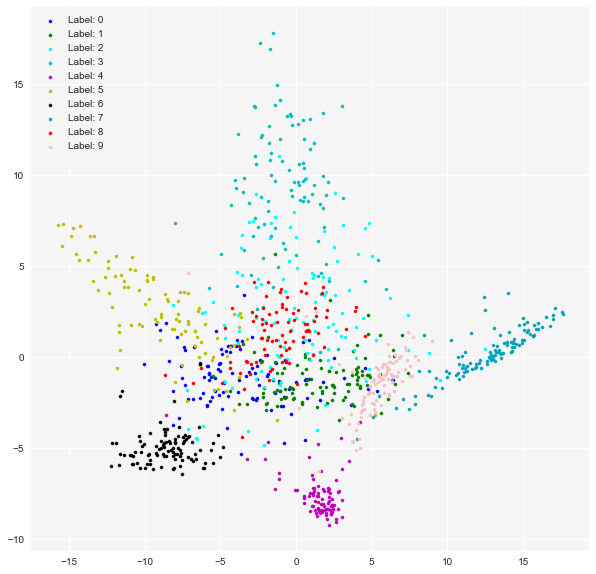

(1000, 40)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.769839
[t-SNE] Iteration 25: error = 1.0888543, gradient norm = 0.0071552
[t-SNE] Iteration 50: error = 0.9974761, gradient norm = 0.0099780
[t-SNE] Iteration 75: error = 0.6949068, gradient norm = 0.0014099
[t-SNE] Iteration 100: error = 0.6621364, gradient norm = 0.0035352
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.662136
[t-SNE] Iteration 125: error = 0.6009318, gradient norm = 0.0008925
[t-SNE] Iteration 125: gradient norm 0.000892. Finished.
[t-SNE] Error after 125 iterations: 0.662136


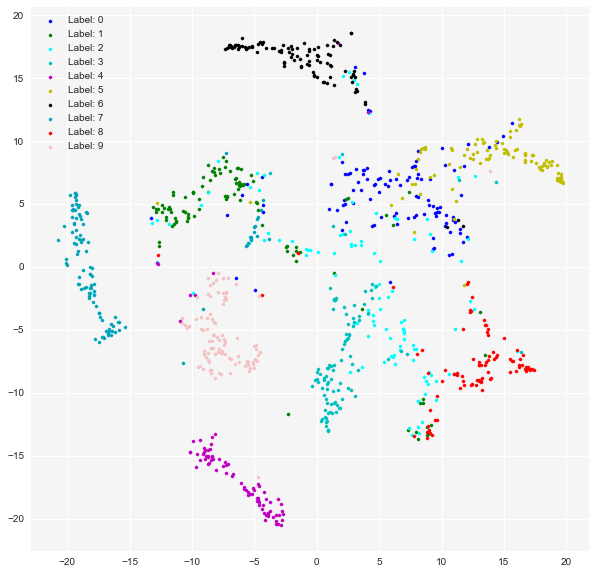

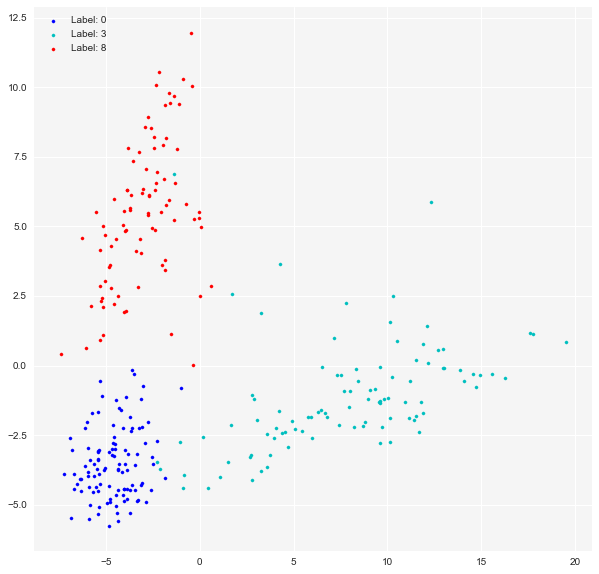

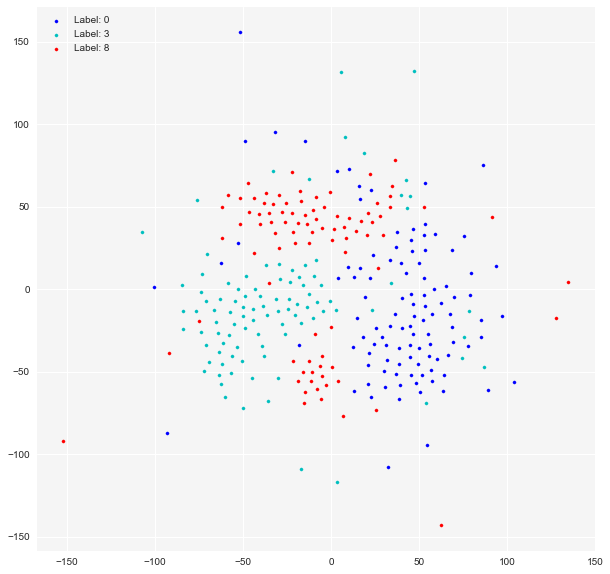

In [58]:
# Load feature vector data
with open('output/' + saved_filename + '__feature_layer_outputs' + '.pkl', 'rb') as f:
        input = pickle.load(f)
features = np.array(input[0])
labels = np.array(input[1])
images = np.array(input[2])
parameter_dict = input[3]

# Load gate vector data
with open('output/' + saved_filename + '.pkl', 'rb') as f:
        input = pickle.load(f)
gates = np.array(input[0])

gates = np.reshape(gates, [gates.shape[0], 1, -1]) # To concat with feats
feats_and_gates = np.concatenate([gates,features], axis=2)
feats_and_gates_reshaped = np.reshape(feats_and_gates, [feats_and_gates.shape[0], -1])

visualize_model(feats_and_gates_reshaped, labels, PCA())
visualize_model(feats_and_gates_reshaped, labels, TSNE(verbose=100))
visualize_comparison(feats_and_gates_reshaped, labels, PCA(), digits=[0,3,8])
visualize_comparison(feats_and_gates_reshaped, labels, TSNE(), digits=[0,3,8])


(1000, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


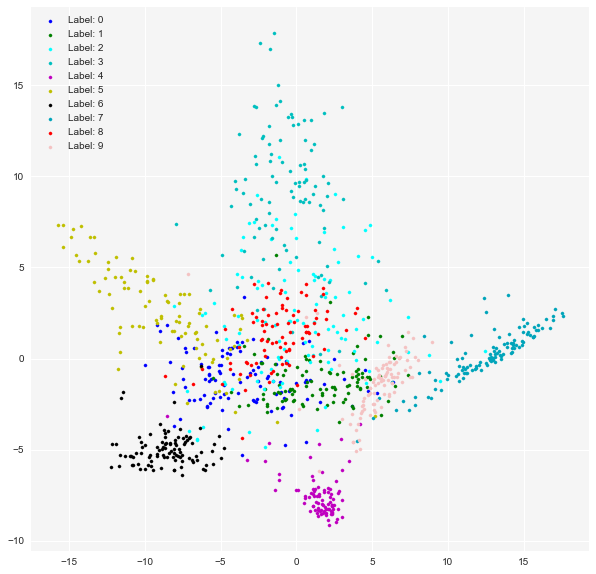

(1000, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.761157
[t-SNE] Iteration 25: error = 1.0933737, gradient norm = 0.0083994
[t-SNE] Iteration 50: error = 1.0245670, gradient norm = 0.0120326
[t-SNE] Iteration 75: error = 0.6936936, gradient norm = 0.0014723
[t-SNE] Iteration 100: error = 0.6650649, gradient norm = 0.0042287
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.665065
[t-SNE] Iteration 125: error = 0.6115193, gradient norm = 0.0008014
[t-SNE] Iteration 125: gradient norm 0.000801. Finished.
[t-SNE] Error after 125 iterations: 0.665065


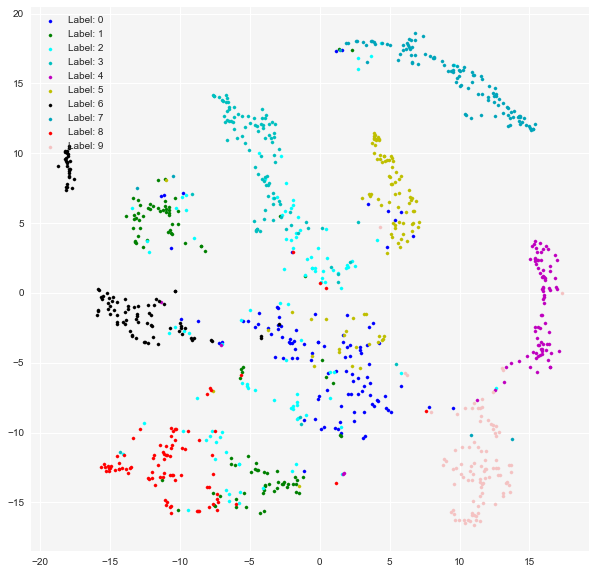

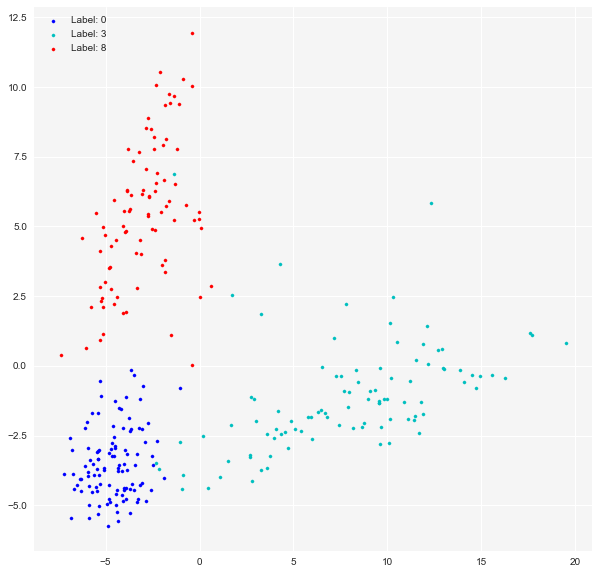

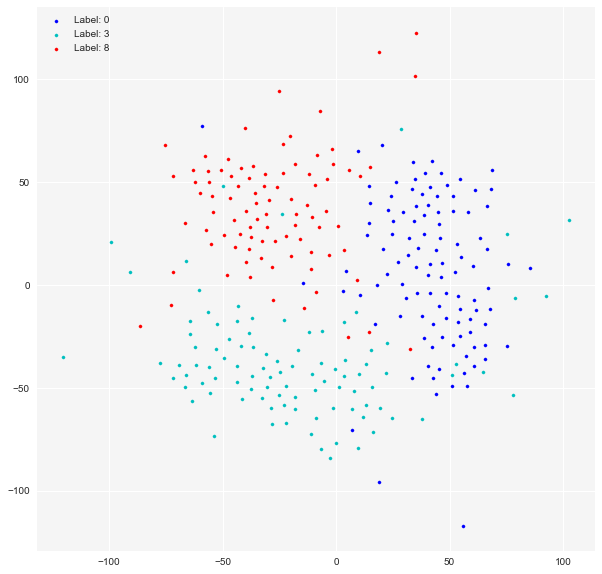

In [59]:
# Load feature vector data
with open('output/' + saved_filename + '__feature_layer_outputs' + '.pkl', 'rb') as f:
        input = pickle.load(f)
features = np.array(input[0])
labels = np.array(input[1])
images = np.array(input[2])
parameter_dict = input[3]

features_reshaped = np.reshape(features, [features.shape[0], -1])
visualize_model(features_reshaped, labels, PCA())
visualize_model(features_reshaped, labels, TSNE(verbose=100))
visualize_comparison(features_reshaped, labels, PCA(), digits=[0,3,8])
visualize_comparison(features_reshaped, labels, TSNE(), digits=[0,3,8])


(1000, 30)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


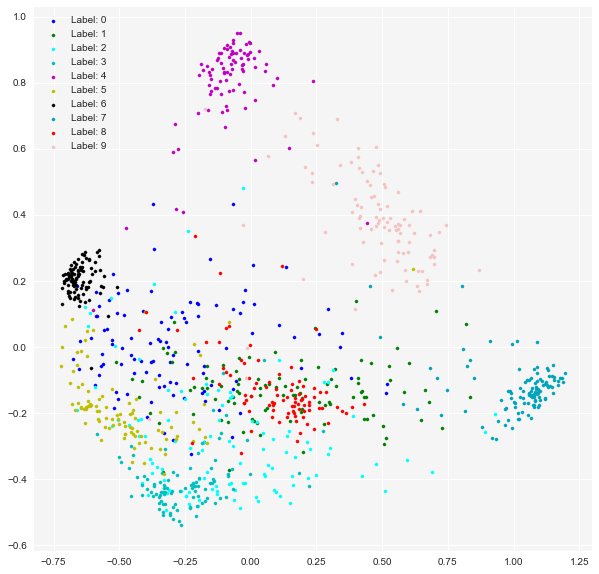

(1000, 30)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.121292
[t-SNE] Iteration 25: error = 1.1411513, gradient norm = 0.0086714
[t-SNE] Iteration 50: error = 1.0925939, gradient norm = 0.0126997
[t-SNE] Iteration 75: error = 0.7462717, gradient norm = 0.0020469
[t-SNE] Iteration 100: error = 0.7140399, gradient norm = 0.0057112
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.714040
[t-SNE] Iteration 125: error = 0.6431630, gradient norm = 0.0008263
[t-SNE] Iteration 125: gradient norm 0.000826. Finished.
[t-SNE] Error after 125 iterations: 0.714040


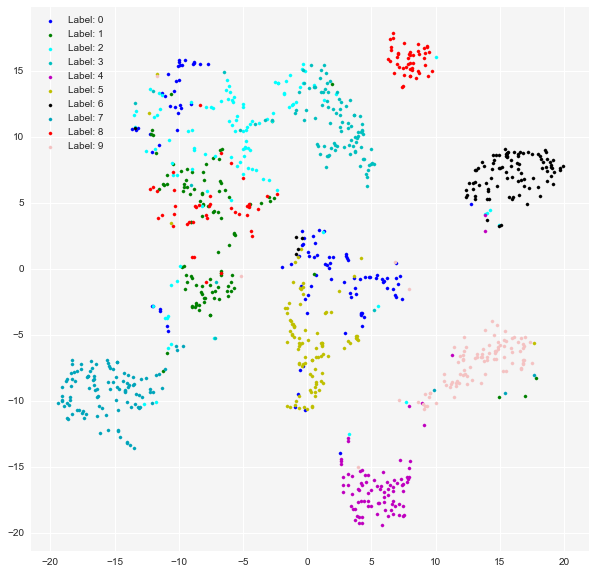

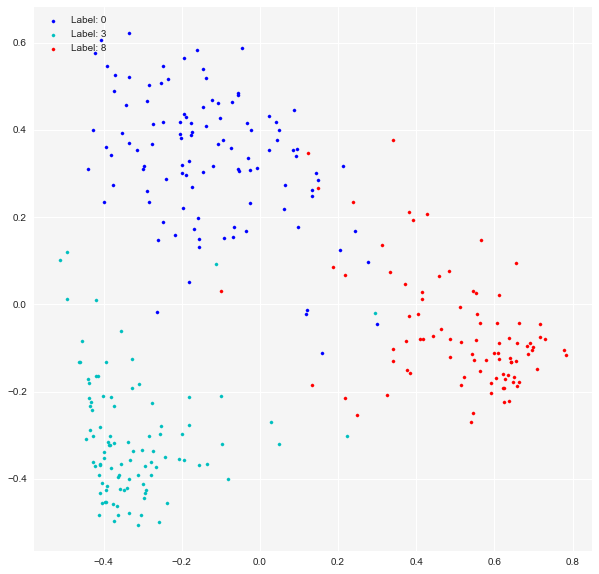

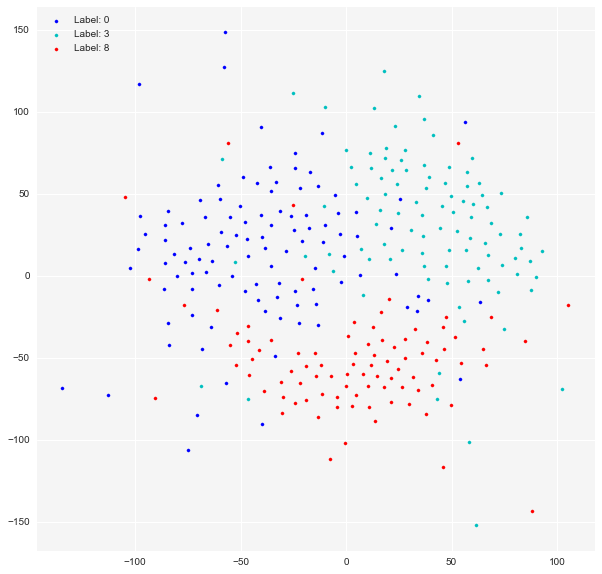

In [60]:
# Load gate vector data
with open('output/' + saved_filename + '.pkl', 'rb') as f:
        input = pickle.load(f)
gates = np.array(input[0])
labels = np.array(input[1])
images = np.array(input[2])
parameter_dict = input[3]

gates_reshaped = np.reshape(gates, [gates.shape[0], -1])
visualize_model(gates_reshaped, labels, PCA())
visualize_model(gates_reshaped, labels, TSNE(verbose=100))
visualize_comparison(gates_reshaped, labels, PCA(), digits=[0,3,8])
visualize_comparison(gates_reshaped, labels, TSNE(), digits=[0,3,8])
